![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


In [2]:
df=pd.read_csv('Hospitalizacion_3.csv')
df.shape

(542, 32)

Separen el dataset en X, y (variable objetivo)

In [3]:
X=df.drop(columns='Hospitalizacion')#Variables independientes
y=df['Hospitalizacion'] #Variable objetivo

In [4]:
df['Hospitalizacion'].value_counts(True)

Hospitalizacion
0    0.957565
1    0.042435
Name: proportion, dtype: float64

Separen el dataset en X_train, X_test, y_train y y_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [6]:
clf = DecisionTreeClassifier(random_state = 42)
treee = clf.fit(X_train,y_train)
y_train_pred= treee.predict(X_train)
y_test_pred= treee.predict(X_test)

In [7]:
score_train= accuracy_score(y_train,y_train_pred)
score_test= accuracy_score(y_test,y_test_pred)

print(f"Accuracy para train-> {score_train}")
print(f"Accuracy para test-> {score_test}")

Accuracy para train-> 0.9841688654353562
Accuracy para test-> 0.9693251533742331


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [8]:
matriz_entr=confusion_matrix(y_train,y_train_pred)
matriz_test=confusion_matrix(y_test,y_test_pred)


cm_display_train = ConfusionMatrixDisplay(matriz_entr)
cm_display_test = ConfusionMatrixDisplay(matriz_test)

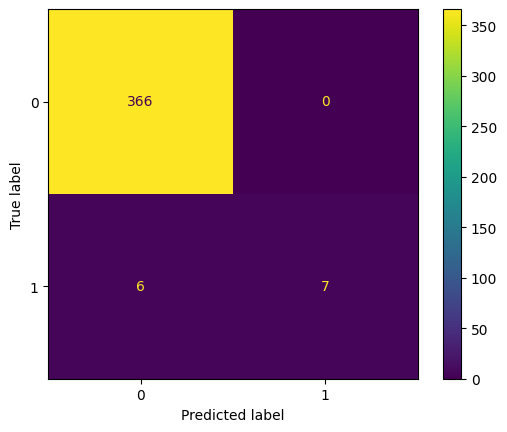

In [9]:
cm_display_train.plot()#Entrenamiento

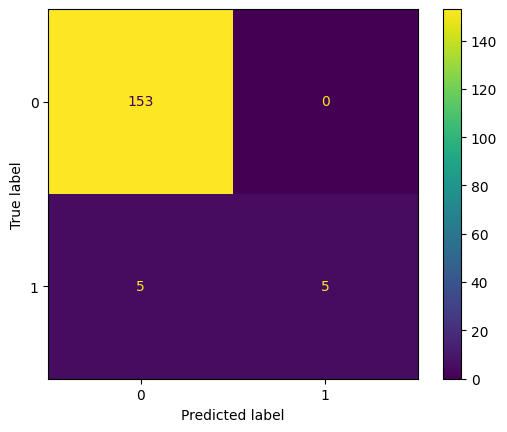

In [10]:
cm_display_test.plot() #testeo

- Observamos que el modelo clf, con solo pasarle random_state=42 tiene predicciones erróneas

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [11]:
#le damos una profundidad de 12 y observamos
arbol_simple= tree.DecisionTreeClassifier(max_depth=12,random_state=42)

In [12]:
arbol_simple.fit(df.drop(columns='Hospitalizacion'),df['Hospitalizacion'])

DecisionTreeClassifier(max_depth=12, random_state=42)

In [13]:
#Validación cruzada para ver el área bajo la curva
cross_val_score(arbol_simple,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='roc_auc',cv=12).mean()

0.8658936751233263

In [14]:
#Validación cruzada para ver la exactitud del modelo
cross_val_score(arbol_simple,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='accuracy',cv=12).mean()

0.9723429951690822

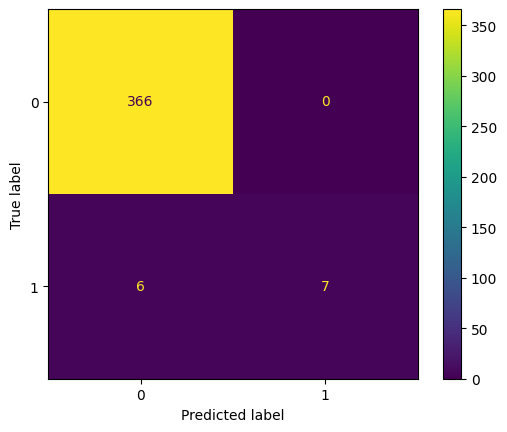

In [15]:
y_train_pred2= arbol_simple.predict(X_train)
y_test_pred2= arbol_simple.predict(X_test)

matriz_entr2=confusion_matrix(y_train,y_train_pred2)
matriz_test2=confusion_matrix(y_test,y_test_pred2)

cm_display_train2 = ConfusionMatrixDisplay(matriz_entr2)
cm_display_test2 = ConfusionMatrixDisplay(matriz_test2)

cm_display_train2.plot() #Entrenamiento

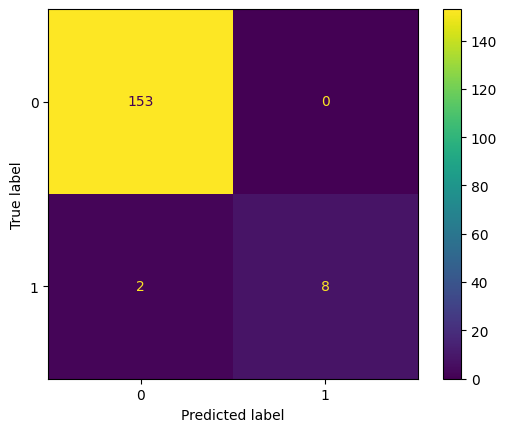

In [16]:
cm_display_test2.plot()#testeo

- Mejoró un poco pasando como hiperparámetros la profundidad del árbol en 12 y random_state=42

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [17]:
variables= df.drop(columns='Hospitalizacion').columns

In [18]:
#observamos las variables que tienen mas peso o importancia
sorted(zip(arbol_simple.feature_importances_ ,variables),reverse=True)

[(0.44079610400268654, 'Tipo De Cultivo_0'),
 (0.3655672547207634, 'Edad'),
 (0.05920434602136594, 'Antibiotico Utilizado En La Profilaxis_Otros'),
 (0.03847033454552885, 'Antibiotico Utilizado En La Profilaxis_Oroquinolonas'),
 (0.023159342982083313, 'Volumen Prostatico'),
 (0.02105043414093008,
  'Antibiotico Utilizado En La Profilaxis_Cefalosporina_Aminoglucocido'),
 (0.01973478200712198, 'Enf. Cronica Pulmonar Obstructiva'),
 (0.011277018289784002,
  'Antibiotico Utilizado En La Profilaxis_Fluoroquinolona_Aminoglicosido'),
 (0.01099813695973431, 'Diabetes'),
 (0.009742246330001505, 'Biopsia_Neg'),
 (0.0, 'Uso de Cateter Urinario'),
 (0.0, 'Tipo De Cultivo_Urocultivo'),
 (0.0, 'Tipo De Cultivo_Hemocultivo Y Urocultivo'),
 (0.0, 'Tipo De Cultivo_Hemocultivo'),
 (0.0,
  'Patron De Resistencia_Resistente A Ampi, Sulfa, Cefadroxilo, Cefuroximo, Cipro Y Cefepime, Cefotaxima'),
 (0.0, 'Patron De Resistencia_Resistente A Ampi, Cipro Y Genta'),
 (0.0, 'Patron De Resistencia_Multi Sensible')

In [19]:
#Creamos un modelo con profundidad de 13, random_state=13 y en peso colocamos 'balanced' para balancear la clase objetivo ya que está desbalanceada con los
#valores que tenemos por defecto: 
arbol_balanceado= tree.DecisionTreeClassifier(max_depth=13,random_state=42,class_weight='balanced')
arbol_balanceado.fit(df.drop(columns='Hospitalizacion'),df['Hospitalizacion'])


cross_val_score(arbol_balanceado,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='roc_auc',cv=12).mean()

0.8620177061310783

In [20]:
#Con validación cruzada aumenta un poco mas la precisión, de 0.59 a 0.63. Observamos ese valor (0.59) un poco mas abajo el reporte de clasificación
cross_val_score(arbol_balanceado,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='precision',cv=12).mean()

0.6319444444444444

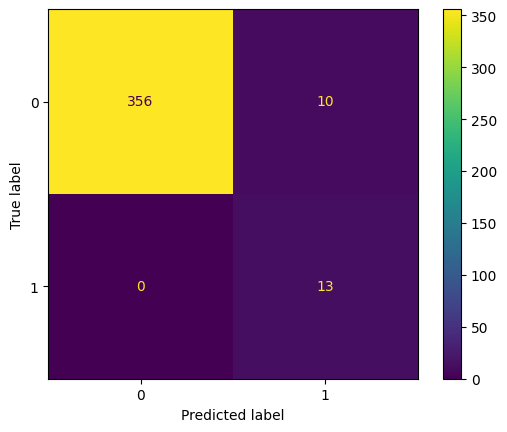

In [21]:
y_train_pred3= arbol_balanceado.predict(X_train)
y_test_pred3= arbol_balanceado.predict(X_test)

matriz_entr3=confusion_matrix(y_train,y_train_pred3)
matriz_test3=confusion_matrix(y_test,y_test_pred3)

cm_display_train3 = ConfusionMatrixDisplay(matriz_entr3)
cm_display_test3 = ConfusionMatrixDisplay(matriz_test3)

cm_display_train3.plot()#Entrenamiento

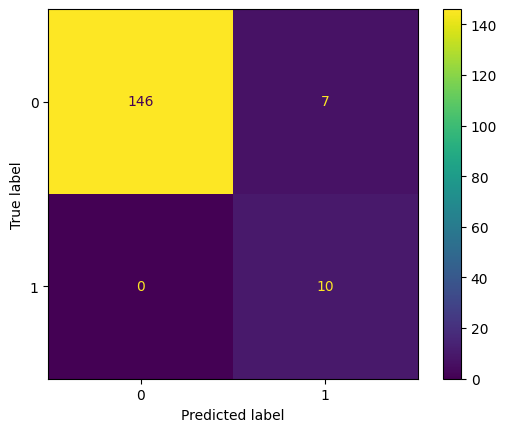

In [22]:
cm_display_test3.plot()#test

- Observamos que un modelo balanceado, clasifica un poco mejor

In [23]:
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       153
           1       0.59      1.00      0.74        10

    accuracy                           0.96       163
   macro avg       0.79      0.98      0.86       163
weighted avg       0.97      0.96      0.96       163



Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [32]:
#Realizamos un 'GridSearchCV' para encontrar los mejores hiperparámetros y crear un modelo con dichos valores y observar su comportamiento
param_grid = {
    'max_depth': [5, 10, 12, 15, 20, ],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4, 8],  
    'max_features': ['sqrt', 'log2', 0.5],  
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random']  
}


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=arbol_balanceado, param_grid=param_grid, scoring='precision', cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



c:\Users\llaur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\llaur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\llaur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\llaur\AppData\Local

In [33]:
best_params

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [34]:
#Creamos un último modelo tomando los mejores hiperparámetros
mejor_arbol= tree.DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=0.5, min_samples_leaf=1, min_samples_split=2,criterion='gini',
                       random_state=42, splitter='random')
mejor_arbol.fit(df.drop(columns='Hospitalizacion'),df['Hospitalizacion'])

cross_val_score(mejor_arbol,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='roc_auc',cv=12).mean()

0.8639556906272023

In [35]:
cross_val_score(mejor_arbol,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='precision',cv=12).mean()

0.6284722222222222

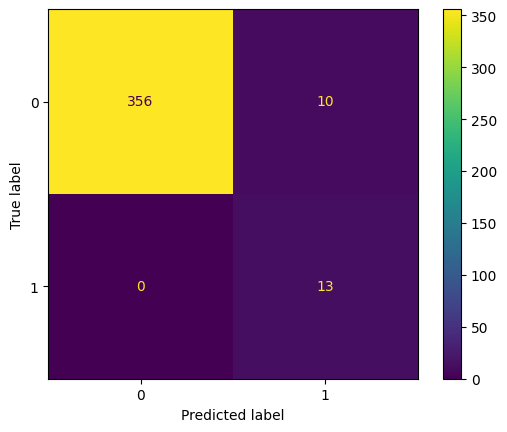

In [27]:
y_train_pred4= mejor_arbol.predict(X_train)
y_test_pred4= mejor_arbol.predict(X_test)

matriz_entr4=confusion_matrix(y_train,y_train_pred4)
matriz_test4=confusion_matrix(y_test,y_test_pred4)

cm_display_train4 = ConfusionMatrixDisplay(matriz_entr4)
cm_display_test4 = ConfusionMatrixDisplay(matriz_test4)

cm_display_train4.plot()

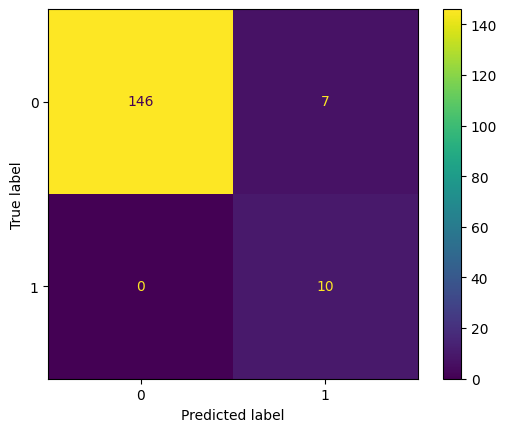

In [28]:
cm_display_test4.plot()

In [29]:
print(classification_report(y_test,y_test_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       153
           1       0.59      1.00      0.74        10

    accuracy                           0.96       163
   macro avg       0.79      0.98      0.86       163
weighted avg       0.97      0.96      0.96       163



- Vemos que no mejora mucho con respecto al modelo anterior

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [252]:
X=df.drop(columns='Hospitalizacion')#Variables independientes
y=df['Hospitalizacion'] #Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [337]:
clasificador_knn= KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')
clasificador_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

In [338]:
ypredknn_train= clasificador_knn.predict(X_train)
ypredknn_test= clasificador_knn.predict(X_test)

In [339]:
print(f"Score train-> {f1_score(y_train, ypredknn_train,average='micro')}")
print(f"Score test-> {f1_score(y_test, ypredknn_test,average='micro')}")

Score train-> 0.9841688654353562
Score test-> 0.9631901840490797


In [361]:
print(classification_report(y_test,ypredknn_test))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       153
           1       1.00      0.40      0.57        10

    accuracy                           0.96       163
   macro avg       0.98      0.70      0.78       163
weighted avg       0.96      0.96      0.96       163



In [331]:
cross_val_score(clasificador_knn,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='roc_auc',cv=14).mean()#Área bajo la curva

0.9044401544401545

In [349]:
#El recall y f1-score del modelo son muy bajos
cross_val_score(clasificador_knn,df.drop(columns='Hospitalizacion'),df['Hospitalizacion'],scoring='recall',cv=13).mean()

0.4230769230769231

In [364]:
#Buscamos mejores parámetros para K-vecinos
param_grid = {
    'n_neighbors': [1,2,3, 5, 7, 9, 11,13,15,27,29,21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=clasificador_knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model

KNeighborsClassifier(n_neighbors=2, weights='distance')

Compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [365]:
#Reporte para Árbol de decision optimizado
print(classification_report(y_test,y_test_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       153
           1       0.59      1.00      0.74        10

    accuracy                           0.96       163
   macro avg       0.79      0.98      0.86       163
weighted avg       0.97      0.96      0.96       163



In [366]:
#Reporte para K-Vecinos
print(classification_report(y_test,ypredknn_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       153
           1       1.00      0.40      0.57        10

    accuracy                           0.96       163
   macro avg       0.98      0.70      0.78       163
weighted avg       0.96      0.96      0.96       163



De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

In [367]:
df['Hospitalizacion'].value_counts(True)

Hospitalizacion
0    0.957565
1    0.042435
Name: proportion, dtype: float64

El modelo puede mejorar ajustando la variable objetivo, hay una diferencia considerable respecto a pacientes con Hospitalización (1) con un valor de casi 96% y los de No hospitalizacion (0) con solo el 4%.<br>

Tenemos la opción de abordar el desequilibrio de clases en nuestro conjunto de datos mediante estrategias como el sobremuestreo (oversampling) o el submuestreo (undersampling), así como la generación de valores sintéticos.<br>

Luego, se puede evaluar cuál de estas opciones ofrece el mejor rendimiento. Además, aplicar métodos de validación cruzada para obtener una estimación precisa del rendimiento del modelo y capturar los mejores parámetros a través de técnicas como la búsqueda en cuadrícula (Grid Search) para afinar el modelo.<br> Esto nos permetirá observar cómo se desempeña el modelo finalmente ajustado en términos de su capacidad para clasificar correctamente en un contexto de clases desequilibradas.